# Tarea 1

## Definición de las funciones

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate, lagrange
from time import time

# Definimos las funciones
f1 = lambda x: np.sin(x)
f2 = lambda x: np.exp(-20 * x**2)
f3 = lambda x: 1 / (1 + 25 * x**2)

### Implementación del método de diferencias divididas de Newton


In [71]:
def newton_divided_diff(x, y):
    n = len(x)
    coeff = np.copy(y)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coeff[i] = (coeff[i] - coeff[i - 1]) / (x[i] - x[i - j])
    return coeff

def newton_polynomial(x, x_points, coeff):
    n = len(coeff)
    poly = coeff[-1]
    for i in range(n - 2, -1, -1):
        poly = poly * (x - x_points[i]) + coeff[i]
    return poly

### Parámetros

In [82]:
# Número de nodos de interpolación
n_points = 11

# Componente x de los nodos de interpolación
x_vals = [np.linspace(0, 6*np.pi, n_points), np.linspace(-1, 1, n_points), np.linspace(-1, 1, n_points)]

# Componente x para la representación gráfica
x_plot = [np.linspace(0, 6*np.pi, 5000), np.linspace(-1,1,5000), np.linspace(-1,1,5000)]

### Métodos de interpolación polinómica y sus gráficas


Procesando la función sin(x)


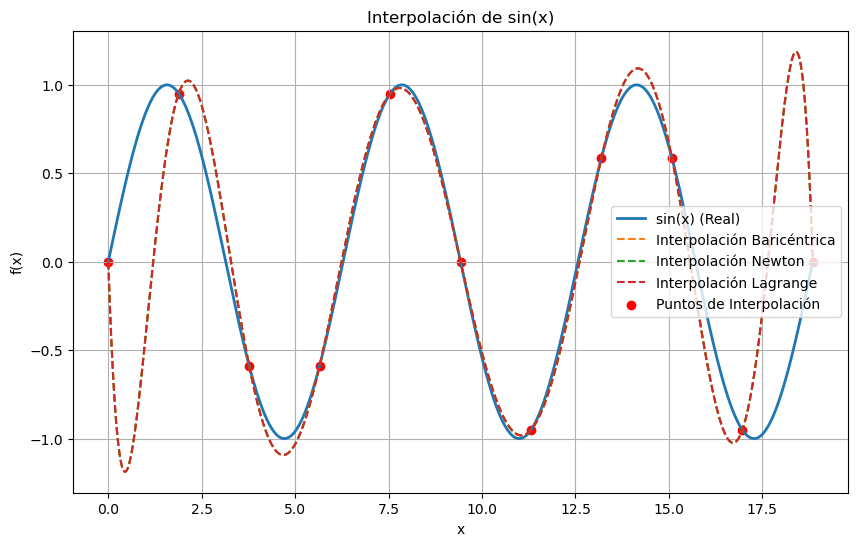

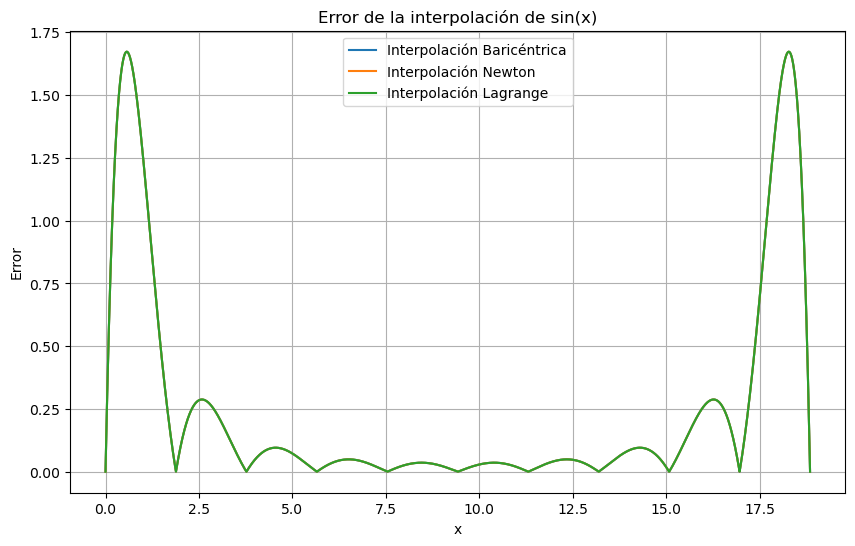

Tiempo Baricéntrico: 0.00199818611 s
Tiempo Newton: 0.000000 s
Tiempo Lagrange: 0.001000 s
Error medio absoluto Baricéntrico: 2.528003e-01
Error medio absoluto Newton: 2.528003e-01
Error medio absoluto Lagrange: 2.528003e-01

Procesando la función exp(-20*x^2)


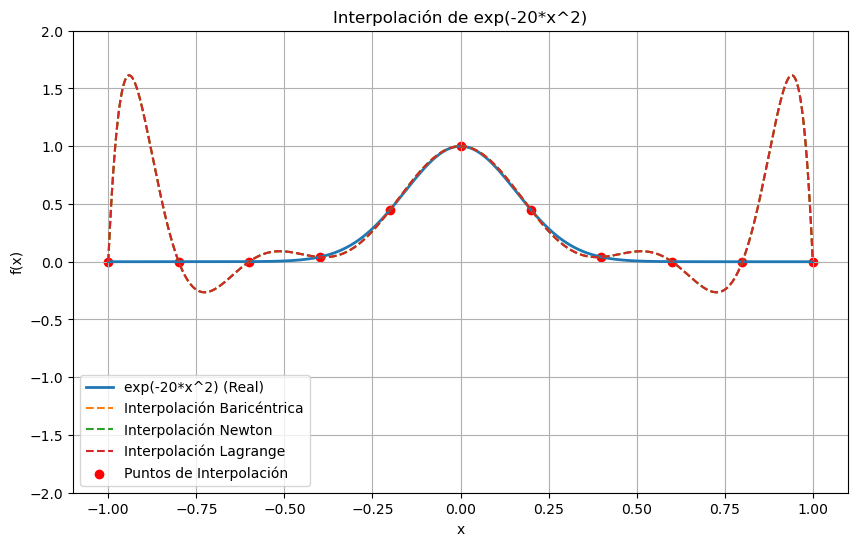

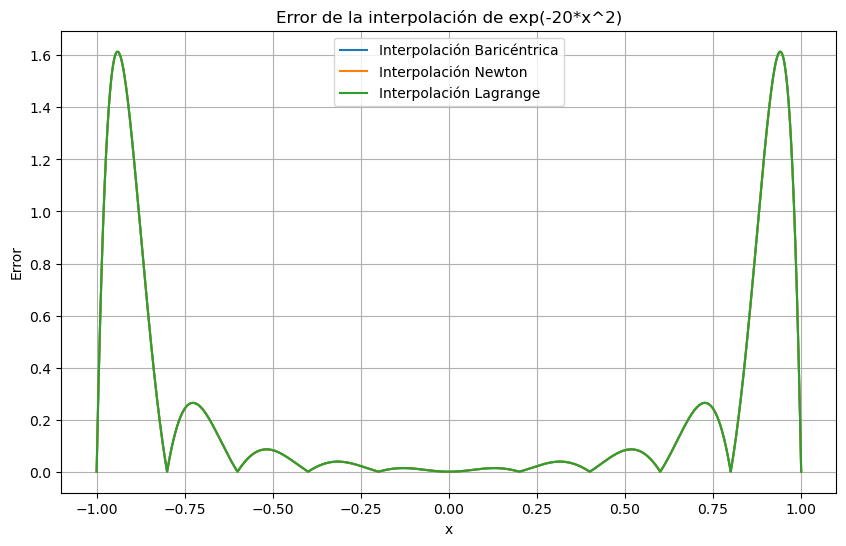

Tiempo Baricéntrico: 0.00093078613 s
Tiempo Newton: 0.000000 s
Tiempo Lagrange: 0.002000 s
Error medio absoluto Baricéntrico: 2.362282e-01
Error medio absoluto Newton: 2.362282e-01
Error medio absoluto Lagrange: 2.362282e-01

Procesando la función 1/(1+25*x^2)


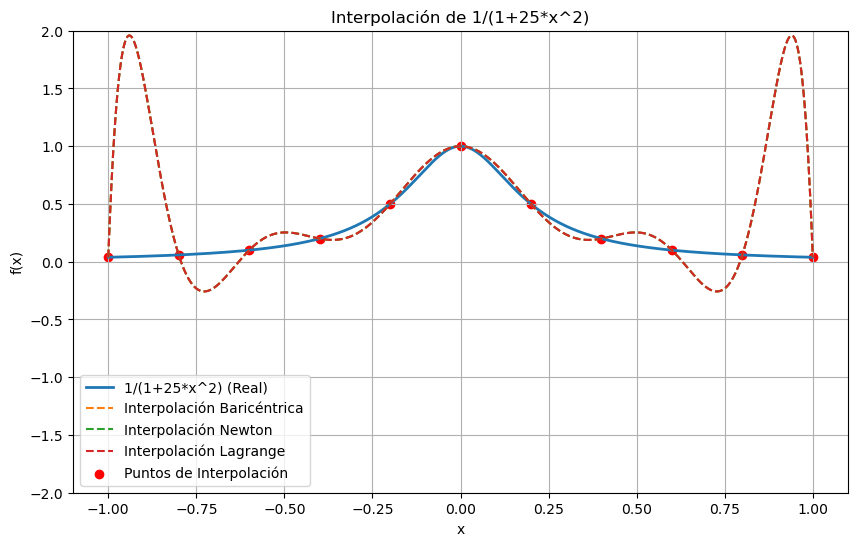

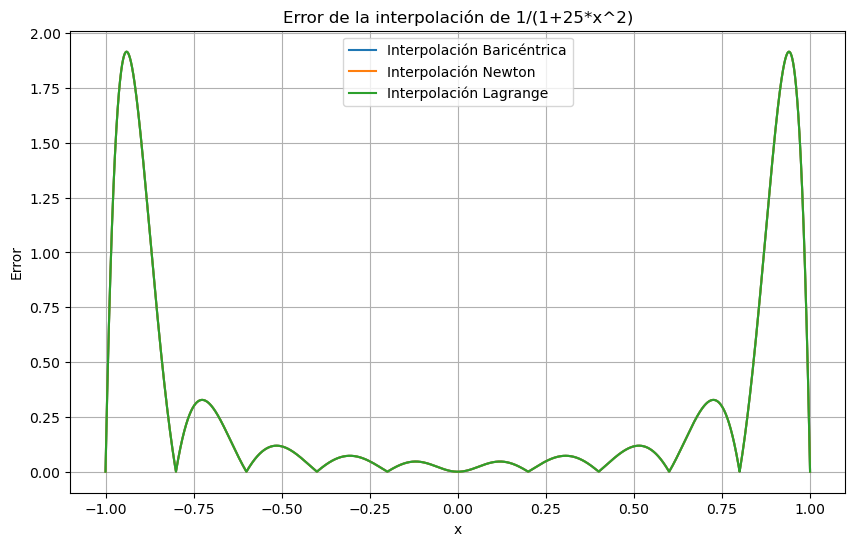

Tiempo Baricéntrico: 0.00099897385 s
Tiempo Newton: 0.000000 s
Tiempo Lagrange: 0.002000 s
Error medio absoluto Baricéntrico: 2.921600e-01
Error medio absoluto Newton: 2.921600e-01
Error medio absoluto Lagrange: 2.921600e-01


In [86]:
functions = [f1, f2, f3]
function_names = ["sin(x)", "exp(-20*x^2)", "1/(1+25*x^2)"]

for i in range(3):
    print(f"\nProcesando la función {function_names[i]}")

    # Componente y de los nodos de interpolación
    y_vals = functions[i](x_vals[i])

    # Interpolación baricéntrica
    start_time = time()
    y_bary = barycentric_interpolate(x_vals[i], y_vals, x_plot[i])
    bary_time = time() - start_time

    # Interpolación de Newton
    start_time = time()
    coeff = newton_divided_diff(x_vals[i], y_vals)
    y_newton = newton_polynomial(x_plot[i], x_vals[i], coeff)
    newton_time = time() - start_time

    # Interpolación de Lagrange (SciPy)
    start_time = time()
    lagrange_poly = lagrange(x_vals[i], y_vals)  # Devuelve un polinomio
    y_lagrange = lagrange_poly(x_plot[i])       # Evalúa el polinomio en los puntos deseados
    lagrange_time = time() - start_time

    # Calcular errores absolutos
    y_true = functions[i](x_plot[i])
    error_bary = np.abs(y_true - y_bary)
    error_newton = np.abs(y_true - y_newton)
    error_lagrange = np.abs(y_true - y_lagrange)

    # Graficar
    # Gráfica de la interpolación
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot[i], y_true, label=f"{function_names[i]} (Real)", linewidth=2)
    plt.plot(x_plot[i], y_bary, label="Interpolación Baricéntrica", linestyle="--")
    plt.plot(x_plot[i], y_newton, label="Interpolación Newton", linestyle="--")
    plt.plot(x_plot[i], y_lagrange, label="Interpolación Lagrange", linestyle="--")

    plt.scatter(x_vals[i], y_vals, color="red", label="Puntos de Interpolación")
    plt.title(f"Interpolación de {function_names[i]}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    if i != 0:   
        plt.ylim(-2,2)
    plt.grid()
    plt.show()

    # Gráfica del error
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot[i], error_bary, label="Interpolación Baricéntrica")
    plt.plot(x_plot[i], error_newton, label="Interpolación Newton")
    plt.plot(x_plot[i], error_lagrange, label="Interpolación Lagrange")
    plt.xlabel("x")
    plt.ylabel("Error")
    plt.title(f"Error de la interpolación de {function_names[i]}")
    plt.legend()
    plt.grid()
    plt.show()

    # Mostrar resultados
    print(f"Tiempo Baricéntrico: {bary_time:.11f} s")
    print(f"Tiempo Newton: {newton_time:.6f} s")
    print(f"Tiempo Lagrange: {lagrange_time:.6f} s")
    print(f"Error medio absoluto Baricéntrico: {np.mean(error_bary):.6e}")
    print(f"Error medio absoluto Newton: {np.mean(error_newton):.6e}")
    print(f"Error medio absoluto Lagrange: {np.mean(error_lagrange):.6e}")

### El método de Chebyshev


Procesando la función sin(x)


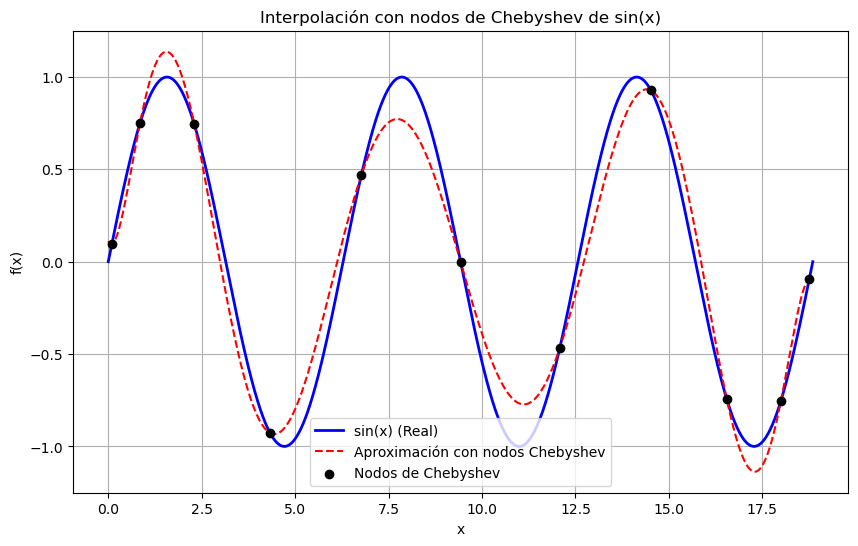

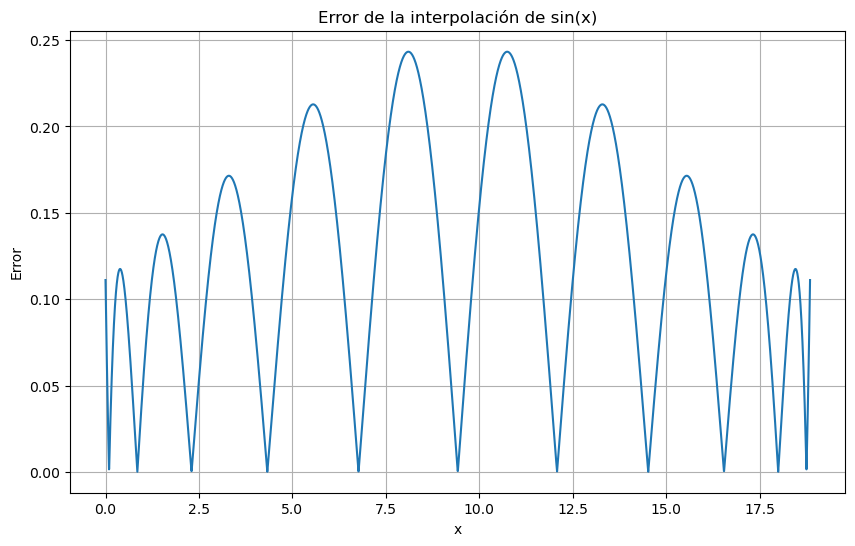

Tiempo Chebyshev: 0.00000000000 s
Error medio absoluto Chebyshev: 1.222781e-01

Procesando la función exp(-20*x^2)


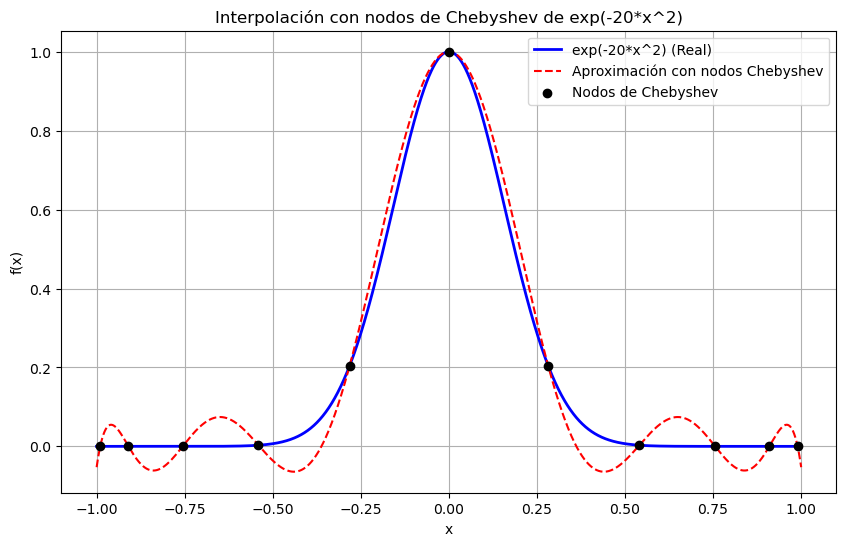

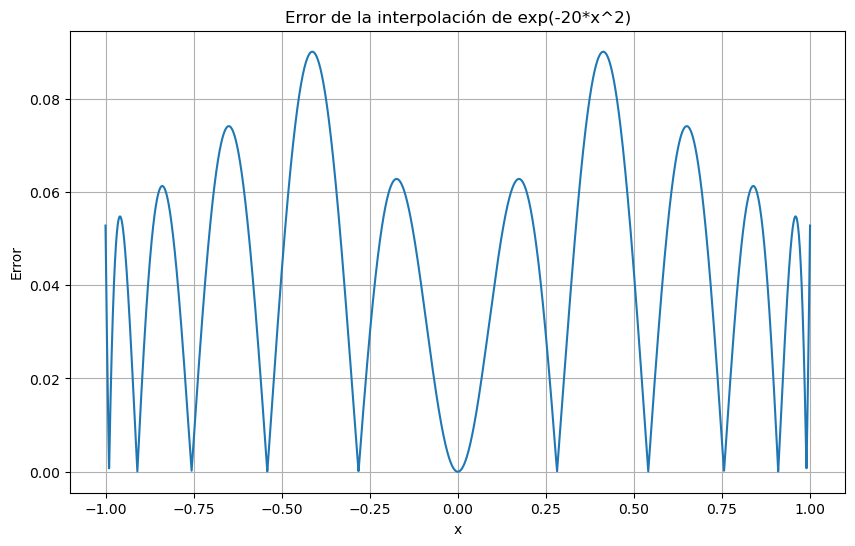

Tiempo Chebyshev: 0.00000000000 s
Error medio absoluto Chebyshev: 4.377916e-02

Procesando la función 1/(1+25*x^2)


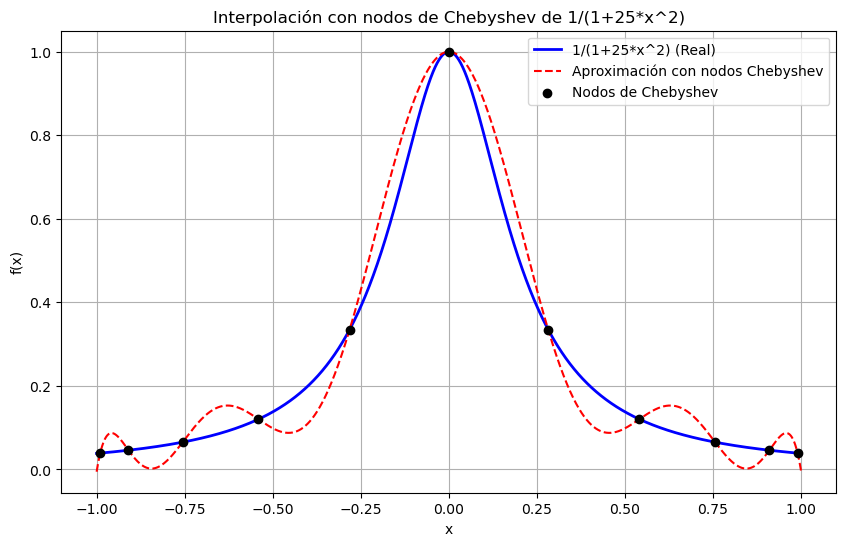

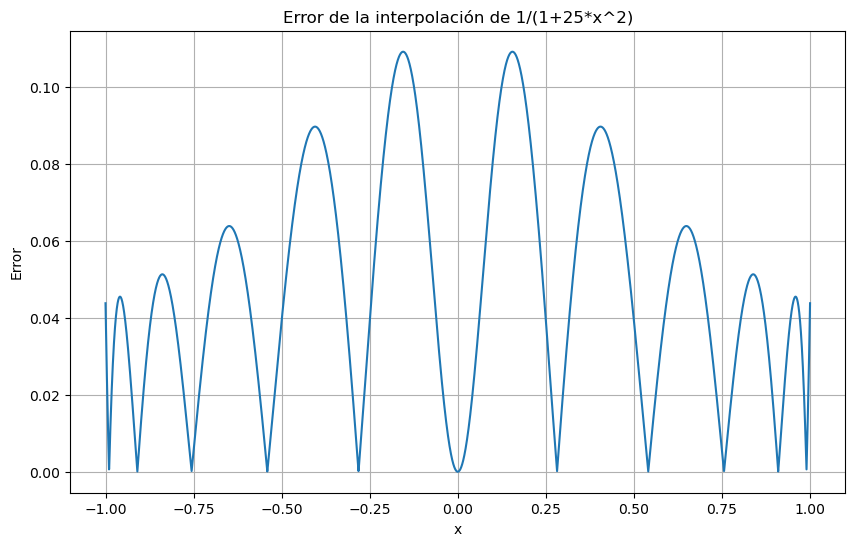

Tiempo Chebyshev: 0.00000000000 s
Error medio absoluto Chebyshev: 4.851182e-02


In [91]:
from numpy.polynomial import Chebyshev


# Generamos los nodos de Chebyshev en el intervalo [-1, 1]
def x_chebyshev(n):
    """Genera nodos de Chebyshev en el intervalo [-1, 1]."""
    k = np.arange(n)
    return np.cos((2 * k + 1) * np.pi / (2 * n))

# Generamos nodos
n = 11
nodes = x_chebyshev(n)

# Intervalo
a = np.array([0,-1,-1])
b =np.array([6*np.pi,1,1])

functions = [f1, f2, f3]
function_names = ["sin(x)", "exp(-20*x^2)", "1/(1+25*x^2)"]

for i in range(3):
    print(f"\nProcesando la función {function_names[i]}")

    # Transformamos los nodos al intervalo [a, b]
    x_chebyshev_transformed = 0.5 * (b[i] - a[i]) * (nodes + 1) + a[i]
   
    # Evaluamos la función en los nodos de Chebyshev
    y_chebyshev = functions[i](x_chebyshev_transformed)
    
    # Creamos el polinomio interpolador usando los nodos Chebyshev
    start_time=time()
    chebyshev_polynomial = Chebyshev.fit(x_chebyshev_transformed, y_chebyshev, deg=n-1)
    chebyshev_time=time()-start_time
    
    # Puntos de la función exacta
    y_plot = functions[i](x_plot[i])
    
    # Evaluamos el polinomio en los puntos de plot
    y_approx = chebyshev_polynomial(x_plot[i])

    # Calcular errores absolutos
    error = np.abs(y_plot - y_approx)
    
    # Graficamos la función original y la aproximación polinómica
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot[i], y_plot, label=f"{function_names[i]} (Real)", linewidth=2, color='blue')
    plt.plot(x_plot[i], y_approx, label='Aproximación con nodos Chebyshev', color='red', linestyle='--')
    plt.scatter(x_chebyshev_transformed, y_chebyshev, color='black', zorder=5, label='Nodos de Chebyshev')
    plt.title(f'Interpolación con nodos de Chebyshev de {function_names[i]}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.show()

    # Graficamos el error de la aproximación
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot[i], error)
    plt.xlabel("x")
    plt.ylabel("Error")
    plt.title(f"Error de la interpolación de {function_names[i]}")
    plt.grid()
    plt.show()

    # Mostrar resultados
    print(f"Tiempo Chebyshev: {chebyshev_time:.11f} s")
    print(f"Error medio absoluto Chebyshev: {np.mean(error):.6e}")

## Tarea 2

### Interpolación con splines 


Procesando la función sin(x)


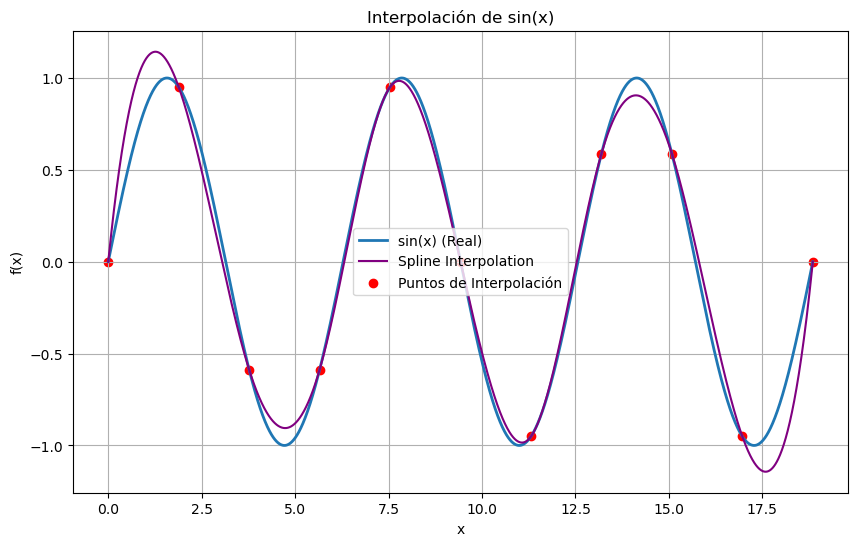

Tiempo Spline: 0.001022 s
Error medio absoluto Spline: 7.334315e-02

Procesando la función exp(-20*x^2)


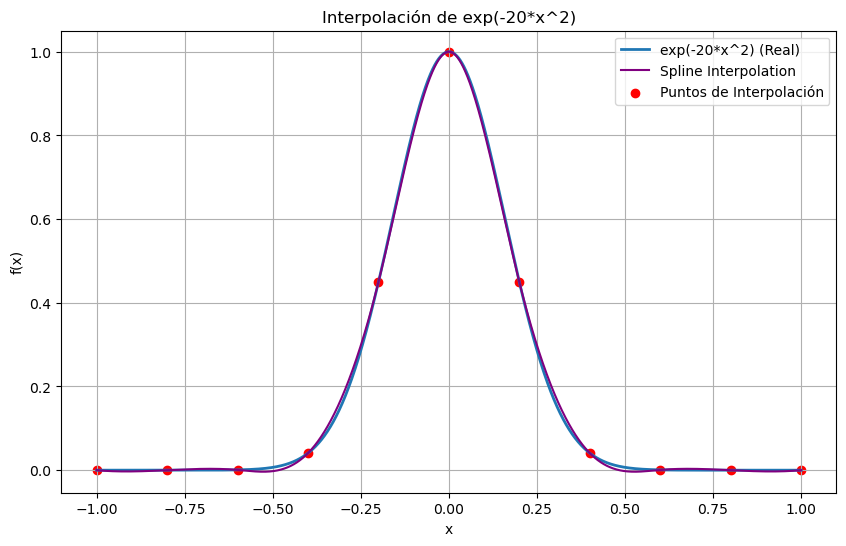

Tiempo Spline: 0.000000 s
Error medio absoluto Spline: 5.156178e-03

Procesando la función 1/(1+25*x^2)


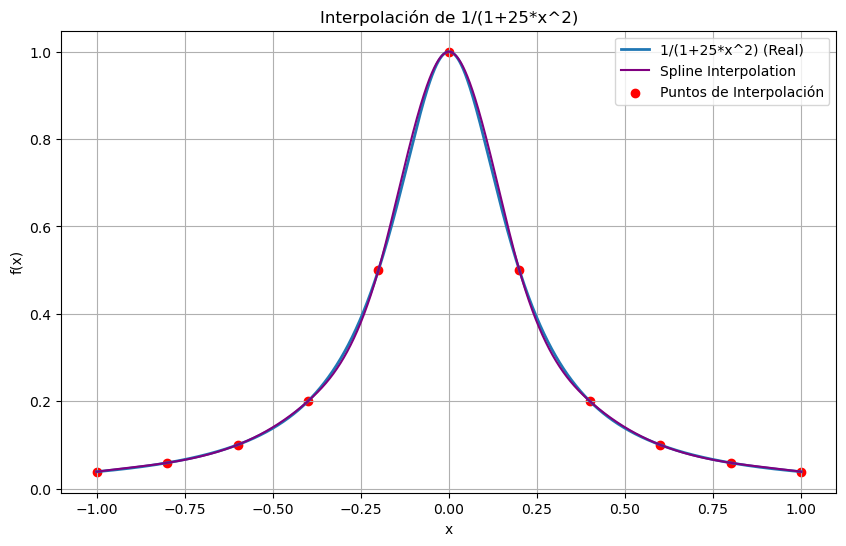

Tiempo Spline: 0.000999 s
Error medio absoluto Spline: 4.306888e-03


In [105]:
from scipy.interpolate import CubicSpline


# Método de Spline
def spline_interp(x_nodes, y_values, x):
    cs = CubicSpline(x_nodes, y_values)
    return cs(x)

# Definimos las funciones
f1 = lambda x: np.sin(x)
f2 = lambda x: np.exp(-20 * x**2)
f3 = lambda x: 1 / (1 + 25 * x**2)

# Número de nodos de interpolación
n_points = 11

# Componente x de los nodos de interpolación
x_vals = [np.linspace(0, 6*np.pi, n_points), np.linspace(-1, 1, n_points), np.linspace(-1, 1, n_points)]

# Componente x para la representación gráfica
x_plot = [np.linspace(0, 6*np.pi, 5000), np.linspace(-1,1,5000), np.linspace(-1,1,5000)]

functions = [f1, f2, f3]
function_names = ["sin(x)", "exp(-20*x^2)", "1/(1+25*x^2)"]

for i in range(3):
    print(f"\nProcesando la función {function_names[i]}")

    # Componente y de los nodos de interpolación
    y_vals = functions[i](x_vals[i])

    # Interpolación de Spine
    start_time = time()
    y_spline = spline_interp(x_vals[i], y_vals, x_plot[i])
    Spline_time = time() - start_time

    # Calcular errores absolutos
    y_true = functions[i](x_plot[i])
    error_spline = np.abs(y_true - y_spline)    

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot[i], y_true, label=f"{function_names[i]} (Real)", linewidth=2)
    plt.plot(x_plot[i], y_spline, label='Spline Interpolation', linestyle='solid', color='purple')
    plt.scatter(x_vals[i], y_vals, color="red", label="Puntos de Interpolación")
    plt.title(f"Interpolación de {function_names[i]}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.show()

    # Mostrar resultados
    print(f"Tiempo Spline: {Spline_time:.6f} s") 
    print(f"Error medio absoluto Spline: {np.mean(error_spline):.6e}")
